<img align="left" src="images/GMIT-logo.png" alt="GMIT" width="220"/>                                                      <img align="right" src="images/data-analytics.png" alt="HDipDA" width="250"/>  

# <center>Programming for Data Analysis 2019 Project: Simulating Real World Data</center>  #

***
**Module Name**: Programming for Data Analysis  
**Module Number**: 52465  
**Student Name**: Yvonne Brady  
**Student ID**: G00376355  
***

**Problem statement**  
For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python.  

We suggest you use the numpy.random package for this purpose.  

Specifically, in this project you should:
* Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.  
* Investigate the types of variables involved, their likely distributions, and their relationships with each other.
* Synthesise/simulate a data set as closely matching their properties as possible.
* Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.  

Note that this project is about simulation – you must synthesise a data set. Some
students may already have some real-world data sets in their own files. It is okay to
base your synthesised data set on these should you wish (please reference it if you do),
but the main task in this project is to create a synthesised data set. 

# Table of Contents #
1. [Introduction](#intro)  

X. [References](#refs)

 ## <a name="intro"></a>1. Introduction ## 
For my data simulation project I have chosen the production of biopharmaceuticals products, in particular monoclonal antibodies (mAbs). Naturally occurring antibodies are produced in the body as part of our immunological defence systems. Whenever we get a cough or cold, or indeed anything more serious, our bodies will produce antibodies to target whatever is causing the illness. This may be a bacterium, _e.g._ Strep throat caused by _Streptococcus pyogenes_, a virus, in the case of a cold or flu, some foreign matter _e.g._ pollen which will result in hayfever or even the bodies own cells when they   become aged or damaged.   Because antibodies may be made to combat any substance that enters the body, they make ideal candidates to harness for therapeutic purposes.  

When the body comes under attack by a substance called a pathogen, for example the common cold, special cells in the body will make antibodies to try and overcome this pathogen. In many cases this happens very successfully and we never even knew we fighting off the infection. Each of these special cells will make their own version of an antibody in the hope that one of them will be successful in overcoming the invader. The body monitors which ones are successful and subsequently  increase the production of the best fit antibody. 

To make a biopharmaceutical a single cell that is good at producing the antibody required is cloned repeatedly. This cloned cell is grown in a vessel called a bioreactor and encouraged to produce the antibody. The contents of the bioreactor are then removed, the antibody extracted and purified to produce the final biopharmaceutical product.  

The data I have chosen to simulate for this project are:  

**Cell line:**  
This is the type of used to produce the antibody. While there are many types of cells utilised in biopharmaceutical production, for the purposes of this project I am ploying categorical data. The cell type may be -
* Microbial cells (_e.g. E. coli._) - being unicellular, these cells are the easiest to grow, but can only produce basic proteins.  
* Animal cell (_e.g._ CHO) - Chinese Hamster Ovary cells are frequently used in biopharmaceutical processing. They can product complicated proteins but are harder to grow in vitro. Mammalian cells are used to being part of a larger organism that has specialised organs to look after for example waste disposal _etc._. They also rely on other organs for physical protection and anchorage _e.g._ bones and skin. Mammalian cells do not adapt well to being on their own in a bioreactor and as a result will grow much slower and be more susceptible to damage than microbial cells.  
* Humanised CHOs - As the body recognises CHO-produced proteins as non-human, they elicit an immune response. CHOS may be genetically manipulated to become humanised. These CHOs produce more human like proteins which are better accepted by the body. This genetic manipulation further destabilises the cells however, making them more difficult again to grow.  

**Size of bioreactor:**
The larger the bioreactor, the greater the amount of product produced. It takes more time for the cells to acclimatise to the bioreactor, particularly the mammalian cells (CHO and humanised CHO). For the purposes of the data simulation it is assumed there will be a uniform distribution of the bioreator sizes.

**Average Temperature reading:**  
There are a number of parameters that are controlled and monitored as part of the cultivation of cells. One such parameter is the temperature. This is controlled via a control system (DCS - Distributed Control System, or PLC - Programmable Logic Controller). While the temperature is monitored and controlled throughout its cultivation time, it is taken for this dataset to be the mean throughout the process. This will be simulated to be a normal distributed attribute. THe microbial cell lines have a good tolerance for temperature, while the mammalian cells do not. Mammalian cells are used to specific organs controlling the temperature of the body, _e.g._ blood, skin, kidneys _etc._ and have no cellular mechanism to do so on its own. As a result mammalian cells are much more susceptible to temperature fluctuations.   

**Dissolved Oxygen reading:**  
Normal distribution  

**Cell Density at peak:**  
Normal Distribution  

**Hours pre-production bioreactor:**  
Student T-Test distribution  

**Culture type:**  
Categorical data:  
* Batch  
* Fed batch  
* Perfusion  

**No of alarms:**  
Poisson distribution of events during the cell growth  

**Media type:**  
Cateorical data.  
* Serum Free  
* Serum based  

**Yield:**  
g of product. Based on all above data

**Net worth of batch:**  
Uniform Distribution multiplier on yield with influence of cell type.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # plotting and as a basis for seaborn
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 6] # Setting the plot size

(array([23., 25., 26., 22., 17., 18., 28., 32., 23., 26.]),
 array([ 562. , 1496.3, 2430.6, 3364.9, 4299.2, 5233.5, 6167.8, 7102.1,
        8036.4, 8970.7, 9905. ]),
 <a list of 10 Patch objects>)

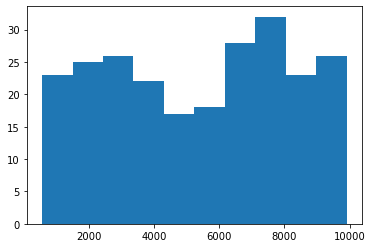

In [2]:
# Start with Bioreactor Size
# This will be a uniformly distributed range of sizes from 500L to 10000L 
brSize = np.random.randint(500, 10000, 240)
plt.hist(brSize)

Next up is our cell type. This is a really important feature as many of the following attributes depend on the cell type. In general, the microbial cell line is more robust, mammalian (CHO) less so, and to a lesser extent the mammalian producing humanised protein even less so. For now, I will evenly split the sample size into three and assume there are equal number of each.

## <a name="refs"></a>8. References ##
1. [NumPy Site](http://www.numpy.org/)
2. [Project Jupyter](http://jupyter.org/)  